# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2005 Захаров Максим Юрьевич
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [8]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import copy

In [2]:
def read_graph(filename): #cчитывание графа из файла
    adj_matrix = list()
    graphfile = open(filename, 'r')
    for l in graphfile:
        l = l.split()
        for i in range(len(l)):
            l[i] = int(l[i])
        adj_matrix.append(l)
    graphfile.close()
    return adj_matrix

def draw_graph(adj_matrix, path):
    graph = nx.DiGraph(np.matrix(adj_matrix))
    colors=[]
    for item in graph.edges():
        catch = 0
        for i in range(len(path)-1):
            if path[i] == item[0] and path[i+1] == item[1]:
                catch+=1
                break
        if catch == 1:
            colors.append('red')
        else:
            colors.append('black')
    pos = nx.circular_layout(graph)  # positions for all nodes
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, pos, node_size=250, node_color = 'royalblue')
    nx.draw_networkx_edges(graph, pos, edge_color=colors, arrows=True, arrowsize = 10, width = 2)
    nx.draw_networkx_labels(graph, pos, font_size=13, font_weight = 'bold', font_family='sans-serif')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels = labels, font_size=11, font_family='sans-serif')
    plt.axis('off')
    plt.show()
    
def convert_adj_matrix(adj_matrix):
    res = []
    for i in range(len(adj_matrix)):
        res.append([])
        for j in range(len(adj_matrix)):
            res[i].append(adj_matrix[i][j])
            if adj_matrix[i][j] == 0 and i!=j:
                res[i][j] = math.inf
    return res

# Алгоритм Флойда-Уоршелла

Начальная вершина:0
Конечная врешина:8
Длина пути: 16


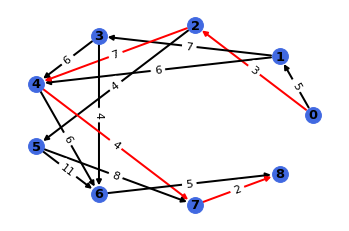

In [7]:
def floyd_warshall_get_path(P, start, end):
    res = [start]
    while start != end:
        start = P[start][end]
        res.append(start)
    return res

def floyd_warshall(adj_matrix, start, end):

    N = len(adj_matrix)                       # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]  # начальный список предыдущих вершин для поиска кратчайших маршрутов

    for k in range(N):
        for i in range(N):
            for j in range(N):
                if adj_matrix[i][k] < math.inf and adj_matrix[k][j] < math.inf and adj_matrix[i][j] > adj_matrix[i][k] + adj_matrix[k][j]:
                    adj_matrix[i][j] = adj_matrix[i][k] + adj_matrix[k][j]
                    P[i][j] = P[i][k]     # номер промежуточной вершины при движении от i к j

    path = floyd_warshall_get_path(P,start,end)
    print(f"Длина пути: {adj_matrix[start][end]}")
    return path
adj_matrix = read_graph('E://Работы/Сиаод/lab6/2.txt')
mat1 = convert_adj_matrix(adj_matrix)
start = int(input('Начальная вершина:'))
end = int(input('Конечная врешина:'))
t1 = time.time()
path = floyd_warshall(mat1, start, end)
floyd_warshall_time = time.time() - t1
draw_graph(adj_matrix,path)

# Алгоритм Дейкстры

Начальная вершина:1
Конечная врешина:3
Длина пути: 7


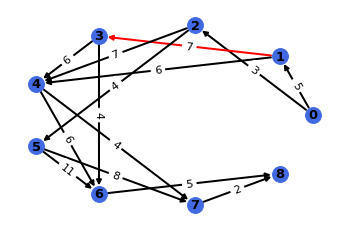

In [4]:
#Функция перебора всех связных вершин с вершиной v
def get_link_v(v, D):
    for i, weight in enumerate(D[v]):
        if weight > 0: 
            yield i

#Функция вершины с минимальным весом
def arg_min(T, S):
    amin = -1
    m = math.inf #Максимальное значение в Т
    for i, t in enumerate(T):
        if t < m and i not in S: #Находим мин значение для тех вершин, которые еще не рассмотрели
            m = t
            amin = i #индекс минимального значение, оно же номер вершины
    return amin

def dijkstra(adj_matrix, start, end):
    N = len(adj_matrix)  # число вершин в графе
    T = [math.inf]*N   # последняя строка таблицы
    v = 0       # стартовая вершина (нумерация с нуля)
    S = {v}     # множество, которое хранит уже просмотренные вершины
    T[v] = 0    # нулевой вес для стартовой вершины
    M = [0]*N
    while v != -1:          # цикл, пока не просмотрим все вершины
        for j in get_link_v(v, adj_matrix):   # перебираем все связанные вершины с вершиной v
            if j not in S:           # если вершина еще не просмотрена
                w = T[v] + adj_matrix[v][j]
                if w < T[j]:
                    T[j] = w
                    M[j] = v  # связываем вершину j с вершиной v

        v = arg_min(T, S)            # выбираем следующий узел с наименьшим весом
        if v > 0:                    # выбрана очередная вершина
            S.add(v) # добавляем новую вершину в рассмотренные
    print(f"Длина пути: {T[end]-T[start]}")
    path = [end]
    while end != start:
        end = M[path[-1]]
        path.append(end)
    path.reverse()
    return path
adj_matrix = read_graph('E://Работы/Сиаод/lab6/2.txt')
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = time.time()
path = dijkstra(adj_matrix, start, end)
dijkstra_time = time.time() - t1
draw_graph(adj_matrix,path)

# Алгоритм Беллмана-Форда

Начальная вершина: 0
Конечная врешина: 8
Длина пути: 16


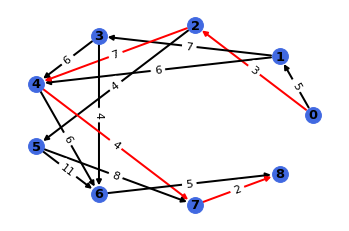

In [24]:
def bellman_ford(adj_matrix, start, end):
    adj_matrix = convert_adj_matrix(adj_matrix)
    path_lengths = [math.inf for item in adj_matrix]
    path_lengths[start] = 0
    paths = [[start] for item in adj_matrix]
    for i in range(len(adj_matrix)):
        for u in range(len(adj_matrix)):
             for v in range(len(adj_matrix)):
                    if path_lengths[u] != math.inf and adj_matrix[u][v] != math.inf and path_lengths[v] > path_lengths[u] + adj_matrix[u][v]:
                        path_lengths[v] = path_lengths[u] + adj_matrix[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        return
    print(f"Длина пути: {path_lengths[end]}")
    return paths[end]
adj_matrix = read_graph('E://Работы/Сиаод/lab6/2.txt')
start = int(input('Начальная вершина: '))
end = int(input('Конечная врешина: '))
t1 = time.time()
path = bellman_ford(adj_matrix, start, end)
bellman_ford_time = time.time() - t1
if path:
    draw_graph(adj_matrix,path)
else:
    draw_graph(adj_matrix,[])

In [19]:
a=[]
for i in range(len(a)):
    if a[i]==1:
        print('sfsg')